# Coffee Quality Datasets

## Overview

In [2]:
#Dealing with a warning about MKL future support.
import os
os.environ['MKL_SERVICE_FORCE_INTEL'] = '1'
os.environ['MKL_DEBUG_CPU_TYPE'] = '5'

In [3]:
import pandas as pd

In [6]:
#Importing the two datasets
df_previous_years = pd.read_csv('merged_data_cleaned.csv')
df_2023 = pd.read_csv('df_arabica_clean_2023.csv')

In [12]:
print('Dataframe for the previous years: ')
print(df_previous_years.head())
print('----------------------------------------')
print('Dataframe for 2023: ')
print(df_2023.head())

Dataframe for the previous years: 
   Unnamed: 0  Species                     Owner Country.of.Origin  \
0           0  Arabica                 metad plc          Ethiopia   
1           1  Arabica                 metad plc          Ethiopia   
2           2  Arabica  grounds for health admin         Guatemala   
3           3  Arabica       yidnekachew dabessa          Ethiopia   
4           4  Arabica                 metad plc          Ethiopia   

                                  Farm.Name Lot.Number       Mill ICO.Number  \
0                                 metad plc        NaN  metad plc  2014/2015   
1                                 metad plc        NaN  metad plc  2014/2015   
2  san marcos barrancas "san cristobal cuch        NaN        NaN        NaN   
3     yidnekachew dabessa coffee plantation        NaN    wolensu        NaN   
4                                 metad plc        NaN  metad plc  2014/2015   

                                 Company       Altitude  ...  C

In [21]:
df_previous_years_columns = set(df_previous_years.columns)
df_2023_columns = set(df_2023.columns)
#Finding the different columns: 
different_columns_2023 = df_2023_columns - df_previous_years_columns
different_columns_previous_years = df_previous_years_columns - df_2023_columns
print('Dataframe Previous Years has these different columns: ')
print(different_columns_previous_years)
print('-----------------------------------------')
print('Dataframe 2023 has these different columns: ')
print(different_columns_2023)

Dataframe Previous Years has these different columns: 
{'altitude_high_meters', 'altitude_mean_meters', 'Certification.Body', 'Number.of.Bags', 'Bag.Weight', 'Harvest.Year', 'In.Country.Partner', 'Category.Two.Defects', 'Cupper.Points', 'Country.of.Origin', 'Moisture', 'ICO.Number', 'Total.Cup.Points', 'Processing.Method', 'Category.One.Defects', 'Certification.Address', 'Clean.Cup', 'Species', 'Certification.Contact', 'unit_of_measurement', 'Grading.Date', 'Owner.1', 'Lot.Number', 'Farm.Name', 'altitude_low_meters'}
-----------------------------------------
Dataframe 2023 has these different columns: 
{'Defects', 'Status', 'Clean Cup', 'Category Two Defects', 'In-Country Partner', 'Certification Body', 'ICO Number', 'Total Cup Points', 'ID', 'Lot Number', 'Processing Method', 'Overall', 'Certification Contact', 'Moisture Percentage', 'Farm Name', 'Number of Bags', 'Category One Defects', 'Bag Weight', 'Certification Address', 'Grading Date', 'Harvest Year', 'Country of Origin'}


In [22]:
df_previous_years.columns = df_previous_years.columns.str.replace(".", " ")
df_2023.columns = df_2023.columns.str.replace("-", " ")

In [24]:
#Finding the different columns again: 
df_previous_years_columns = set(df_previous_years.columns)
df_2023_columns = set(df_2023.columns)
#Finding the different columns: 
different_columns_2023 = df_2023_columns - df_previous_years_columns
different_columns_previous_years = df_previous_years_columns - df_2023_columns
print('Dataframe Previous Years has these different columns: ')
print(different_columns_previous_years)
print('-----------------------------------------')
print('Dataframe 2023 has these different columns: ')
print(different_columns_2023)

Dataframe Previous Years has these different columns: 
{'Cupper Points', 'Owner 1', 'Moisture', 'unit_of_measurement', 'altitude_high_meters', 'altitude_mean_meters', 'Species', 'altitude_low_meters'}
-----------------------------------------
Dataframe 2023 has these different columns: 
{'Overall', 'Defects', 'Moisture Percentage', 'ID', 'Status'}


In [25]:
#Renaming Moisture Percentage to Moisture
df_2023.rename(columns = {"Moisture Percentage":"Moisture"})

,Unnamed: 0,ID,Country of Origin,Farm Name,Lot Number,Mill,ICO Number,Company,Altitude,Region,...,Total Cup Points,Moisture,Category One Defects,Quakers,Color,Category Two Defects,Expiration,Certification Body,Certification Address,Certification Contact
0,0,0,Colombia,Finca El Paraiso,CQU2022015,Finca El Paraiso,NaN,Coffee Quality Union,1700-1930,"Piendamo,Cauca",...,89.33,11.8,0,0,green,3,"September 21st, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
1,1,1,Taiwan,Royal Bean Geisha Estate,"The 2022 Pacific Rim Coffee Summit,T037",Royal Bean Geisha Estate,NaN,Taiwan Coffee Laboratory,1200,Chiayi,...,87.58,10.5,0,0,blue-green,0,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
2,2,2,Laos,OKLAO coffee farms,"The 2022 Pacific Rim Coffee Summit,LA01",oklao coffee processing plant,NaN,Taiwan Coffee Laboratory,1300,Laos Borofen Plateau,...,87.42,10.4,0,0,yellowish,2,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
3,3,3,Costa Rica,La Cumbre,CQU2022017,La Montana Tarrazu MIll,NaN,Coffee Quality Union,1900,"Los Santos,Tarrazu",...,87.17,11.8,0,0,green,0,"September 21st, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
4,4,4,Colombia,Finca Santuario,CQU2023002,Finca Santuario,NaN,Coffee Quality Union,1850-2100,"Popayan,Cauca",...,87.08,11.6,0,2,yellow-green,2,"March 5th, 2024",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,202,202,Brazil,Fazenda Conquista,019/22,Dry Mill,NaN,Ipanema Coffees,950,Sul de Minas,...,80.08,11.4,0,0,green,4,"February 2nd, 2024",Brazil Specialty Coffee Association,"Rua Gaspar Batista Paiva, 416 – Santa Luiza Va...",Chris Allen - 55 35 3212-4705
203,203,203,Nicaragua,Finca San Felipe,017-053-0155,Beneficio Atlantic Sébaco,017-053-0155,Exportadora Atlantic S.A,1200,Matagalpa,...,80.00,10.4,0,2,green,12,"March 2nd, 2024",Asociación de Cafés Especiales de Nicaragua,"Del Hotel Seminole 2 C al lago, 1 C arriba.",Maria Ines Benavidez Toval - 011-(505)-8396 4717
204,204,204,Laos,-,105/3/VL7285-005,DRY MILL,105/3/VL7285-005,Marubeni Corporation,1300,Bolaven Plateau,...,79.67,11.6,0,9,green,11,"November 11th, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
205,205,205,El Salvador,"Rosario de Maria II, Area de La Pila",0423A01,"Optimum Coffee, San Salvador, El Salvador",NaN,Aprentium Enterprises LLC,1200,"Volcan de San Vicente, La Paz, El Salvador",...,78.08,11.0,0,12,bluish-green,13,"March 7th, 2024",Salvadoran Coffee Council,"Final 1a. Av. Norte y 13 Calle Pte., dentro de...",Tomas Bonilla - (503) 2505-6600


In [27]:
common_columns = df_previous_years_columns.intersection(df_2023.columns)
print(common_columns)

{'Flavor', 'Uniformity', 'Body', 'Producer', 'Clean Cup', 'Category Two Defects', 'Aroma', 'Acidity', 'Quakers', 'Certification Body', 'ICO Number', 'In Country Partner', 'Total Cup Points', 'Unnamed: 0', 'Lot Number', 'Altitude', 'Variety', 'Processing Method', 'Region', 'Certification Contact', 'Sweetness', 'Owner', 'Company', 'Mill', 'Farm Name', 'Number of Bags', 'Expiration', 'Category One Defects', 'Bag Weight', 'Color', 'Certification Address', 'Aftertaste', 'Grading Date', 'Harvest Year', 'Balance', 'Country of Origin'}


In [30]:
#Capitalise all the values in all string columns of both datasets

def capitalize_columns(df):
    for col in df.select_dtypes(include=['object']).columns:
        df[col] = df[col].str.title()
    return df

df_previous_years = capitalize_columns(df_previous_years)
df_2023 = capitalize_columns(df_2023)

#See the modified columns
print('Previous Years Dataframe Modified Columns: ') 
print(df_previous_years.head())
print('------------------------------------------')
print('2023 Dataframe Moddified Columns: ')
print(df_2023.head())

Previous Years Dataframe Modified Columns: 
   Unnamed: 0  Species                     Owner Country Of Origin  \
0           0  Arabica                 Metad Plc          Ethiopia   
1           1  Arabica                 Metad Plc          Ethiopia   
2           2  Arabica  Grounds For Health Admin         Guatemala   
3           3  Arabica       Yidnekachew Dabessa          Ethiopia   
4           4  Arabica                 Metad Plc          Ethiopia   

                                  Farm Name Lot Number       Mill Ico Number  \
0                                 Metad Plc        NaN  Metad Plc  2014/2015   
1                                 Metad Plc        NaN  Metad Plc  2014/2015   
2  San Marcos Barrancas "San Cristobal Cuch        NaN        NaN        NaN   
3     Yidnekachew Dabessa Coffee Plantation        NaN    Wolensu        NaN   
4                                 Metad Plc        NaN  Metad Plc  2014/2015   

                                 Company       Altitud

In [33]:
#Merging the two dataframes
df_all_years = pd.concat([df_previous_years, df_2023], ignore_index = True)

#Looking at the new dataframe
print('All Years Data: ')
print(df_all_years.head())

All Years Data: 
   Unnamed: 0  Species                     Owner Country Of Origin  \
0           0  Arabica                 Metad Plc          Ethiopia   
1           1  Arabica                 Metad Plc          Ethiopia   
2           2  Arabica  Grounds For Health Admin         Guatemala   
3           3  Arabica       Yidnekachew Dabessa          Ethiopia   
4           4  Arabica                 Metad Plc          Ethiopia   

                                  Farm Name Lot Number       Mill Ico Number  \
0                                 Metad Plc        NaN  Metad Plc  2014/2015   
1                                 Metad Plc        NaN  Metad Plc  2014/2015   
2  San Marcos Barrancas "San Cristobal Cuch        NaN        NaN        NaN   
3     Yidnekachew Dabessa Coffee Plantation        NaN    Wolensu        NaN   
4                                 Metad Plc        NaN  Metad Plc  2014/2015   

                                 Company       Altitude  ...  \
0      Metad Agri

In [39]:
columns_to_drop = ['Cupper Points', 'Owner 1', 'Unit_Of_Measurement', 'Altitude_High_Meters', 'Altitude_Mean_Meters', 'Species', 'Altitude_Low_Meters', 'Moisture Percentage']
df_all_years = df_all_years.drop(columns = columns_to_drop)

KeyError: "['Cupper Points', 'Owner 1', 'Unit_Of_Measurement', 'Altitude_High_Meters', 'Altitude_Mean_Meters', 'Species', 'Altitude_Low_Meters', 'Moisture Percentage'] not found in axis"

In [40]:
print(df_all_years.head())

   Unnamed: 0                     Owner Country Of Origin  \
0           0                 Metad Plc          Ethiopia   
1           1                 Metad Plc          Ethiopia   
2           2  Grounds For Health Admin         Guatemala   
3           3       Yidnekachew Dabessa          Ethiopia   
4           4                 Metad Plc          Ethiopia   

                                  Farm Name Lot Number       Mill Ico Number  \
0                                 Metad Plc        NaN  Metad Plc  2014/2015   
1                                 Metad Plc        NaN  Metad Plc  2014/2015   
2  San Marcos Barrancas "San Cristobal Cuch        NaN        NaN        NaN   
3     Yidnekachew Dabessa Coffee Plantation        NaN    Wolensu        NaN   
4                                 Metad Plc        NaN  Metad Plc  2014/2015   

                                 Company       Altitude        Region  ...  \
0      Metad Agricultural Developmet Plc      1950-2200  Guji-Hambela  ...

In [43]:
df_all_years = df_all_years.drop(columns = ['Overall', 'Defects', 'Id', 'Status'])

In [44]:
print(df_all_years.head())

   Unnamed: 0                     Owner Country Of Origin  \
0           0                 Metad Plc          Ethiopia   
1           1                 Metad Plc          Ethiopia   
2           2  Grounds For Health Admin         Guatemala   
3           3       Yidnekachew Dabessa          Ethiopia   
4           4                 Metad Plc          Ethiopia   

                                  Farm Name Lot Number       Mill Ico Number  \
0                                 Metad Plc        NaN  Metad Plc  2014/2015   
1                                 Metad Plc        NaN  Metad Plc  2014/2015   
2  San Marcos Barrancas "San Cristobal Cuch        NaN        NaN        NaN   
3     Yidnekachew Dabessa Coffee Plantation        NaN    Wolensu        NaN   
4                                 Metad Plc        NaN  Metad Plc  2014/2015   

                                 Company       Altitude        Region  ...  \
0      Metad Agricultural Developmet Plc      1950-2200  Guji-Hambela  ...

In [46]:
#Check what types the columns are
print(df_all_years.dtypes)

Unnamed: 0                 int64
Owner                     object
Country Of Origin         object
Farm Name                 object
Lot Number                object
Mill                      object
Ico Number                object
Company                   object
Altitude                  object
Region                    object
Producer                  object
Number Of Bags             int64
Bag Weight                object
In Country Partner        object
Harvest Year              object
Grading Date              object
Variety                   object
Processing Method         object
Aroma                    float64
Flavor                   float64
Aftertaste               float64
Acidity                  float64
Body                     float64
Balance                  float64
Uniformity               float64
Clean Cup                float64
Sweetness                float64
Total Cup Points         float64
Moisture                 float64
Category One Defects       int64
Quakers   

In [51]:

import re
import numpy as np

#A function to convert altitude to a numeric value
def convert_altitude(value):
    if pd.isna(value):
        return np.nan  #Returning NaN for missing values
    
    value = str(value).strip().lower()  #Convert to string, strip spaces, and convert to lowercase
    
    #Handles ranges by taking the average
    if '-' in value:
        #Extract numbers from the range and compute the average
        numbers = re.findall(r'\d+', value)
        numbers = list(map(int, numbers))
        if len(numbers) == 2:
            return sum(numbers) / 2
    
    #Handle single number with or without units
    if re.search(r'\d+(\.\d+)?', value):
        number = re.search(r'\d+(\.\d+)?', value).group()
        number = float(number)
        
        #Convert feet to meters if necessary
        if 'ft' in value:
            return number * 0.3048  #1 foot = 0.3048 meters
        
        return number
    
    # If the value cannot be converted, return NaN
    return np.nan

#Applying the conversion function to the Altitude column
df_all_years['Altitude_numeric'] = df_all_years['Altitude'].apply(convert_altitude)

#Printing the columns of the Dataframe to verify the changes
print(df_all_years[['Altitude', 'Altitude_numeric']])



           Altitude  Altitude_numeric
0         1950-2200            2075.0
1         1950-2200            2075.0
2     1600 - 1800 M            1700.0
3         1800-2200            2000.0
4         1950-2200            2075.0
...             ...               ...
1541            950             950.0
1542           1200            1200.0
1543           1300            1300.0
1544           1200            1200.0
1545       850-1100             975.0

[1546 rows x 2 columns]


In [52]:
#Analyzing the Color column
color_counts = df_all_years['Color'].value_counts(dropna=False)
nan_count = df_all_years['Color'].isna().sum()

print('Unique values and their counts in the Color column: ')
print(color_counts)
print(f'\nNumber of NaN values in the Color column: {nan_count}')

Unique values and their counts in the Color column:
Color
Green            971
NaN              270
Bluish-Green     135
Blue-Green        97
Greenish          36
Yellow-Green      10
Brownish           9
Pale Yellow        6
Yellow Green       5
Yellowish          4
Yellow- Green      1
Browish-Green      1
Yello-Green        1
Name: count, dtype: int64

Number of NaN values in the Color column: 270


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 1.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 5.8 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 4.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 262.1/262.1 kB 2.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 2.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.2/68.2 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 2.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 1.7 MB/s eta 0:00:00 0:00:01


Matplotlib is building the font cache; this may take a moment.


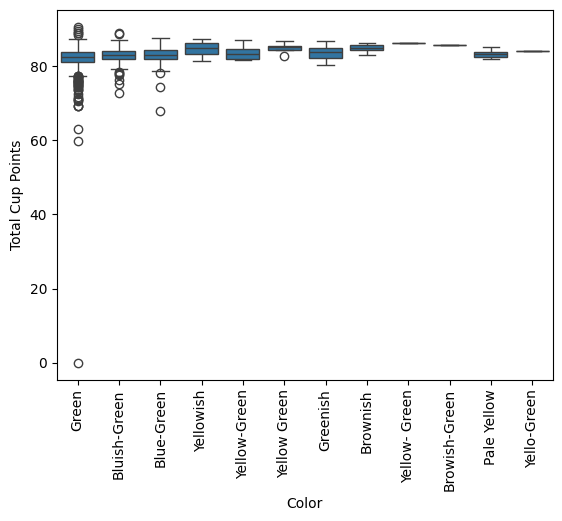

In [54]:
!pip install seaborn

import seaborn as sns
import matplotlib.pyplot as plt

#Making a boxplot to see the distribution of Total Cup Points by Color
sns.boxplot(x='Color', y='Total Cup Points', data=df_all_years)
plt.xticks(rotation=90)
plt.show()

In [57]:
!pip install scikit-learn
from sklearn.impute import KNNImputer

#Initialize the KNNImputer
imputer = KNNImputer(n_neighbors=5)

#Applying the imputer to the dataframe
df_all_years[["Moisture"]] = imputer.fit_transform(df_all_years[["Moisture"]])

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 1.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 4.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 5.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.1/39.1 MB 4.8 MB/s eta 0:00:0000:0100:01
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [58]:
#Same for Quakers

df_all_years["Quakers"].fillna(df_all_years["Quakers"].mean(), inplace=True)

/var/folders/s8/8q4nspg501l5dtl_1yw_prmr0000gn/T/ipykernel_53873/371421187.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_all_years["Quakers"].fillna(df_all_years["Quakers"].mean(), inplace=True)


In [59]:
#Checking again for missing values after I filled them
columns_to_check = [
    'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 
    'Balance', 'Uniformity', 'Clean Cup', 'Sweetness', 
    'Total Cup Points', 'Moisture', 'Category One Defects', 
    'Quakers', 'Category Two Defects'
]

#Calculate the number of NaN values in each column
nan_counts = df_all_years[columns_to_check].isna().sum()

print(nan_counts)

Aroma                   0
Flavor                  0
Aftertaste              0
Acidity                 0
Body                    0
Balance                 0
Uniformity              0
Clean Cup               0
Sweetness               0
Total Cup Points        0
Moisture                0
Category One Defects    0
Quakers                 0
Category Two Defects    0
dtype: int64


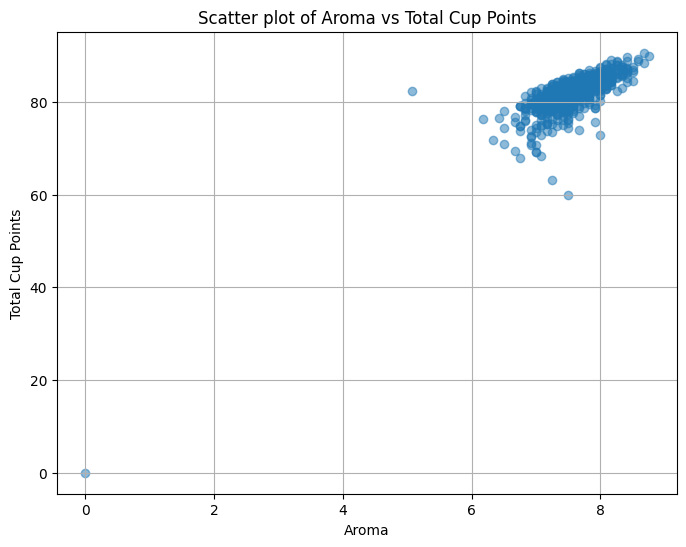

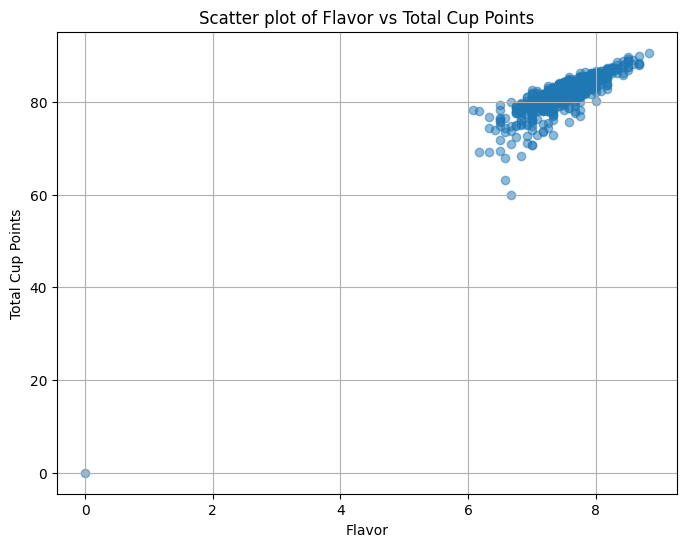

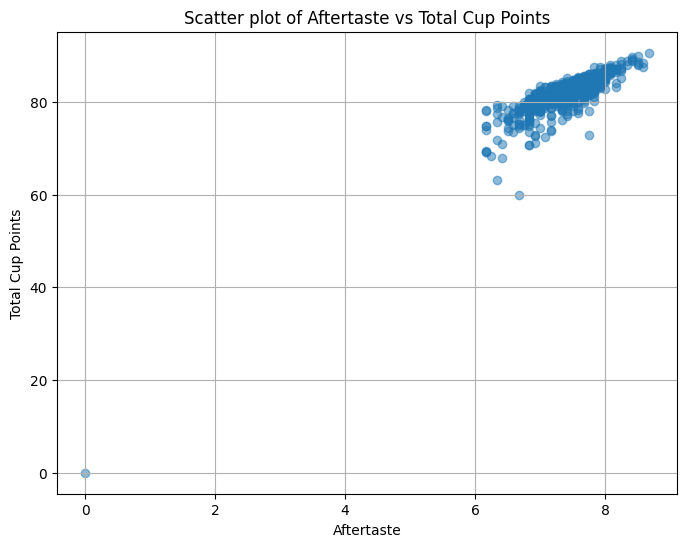

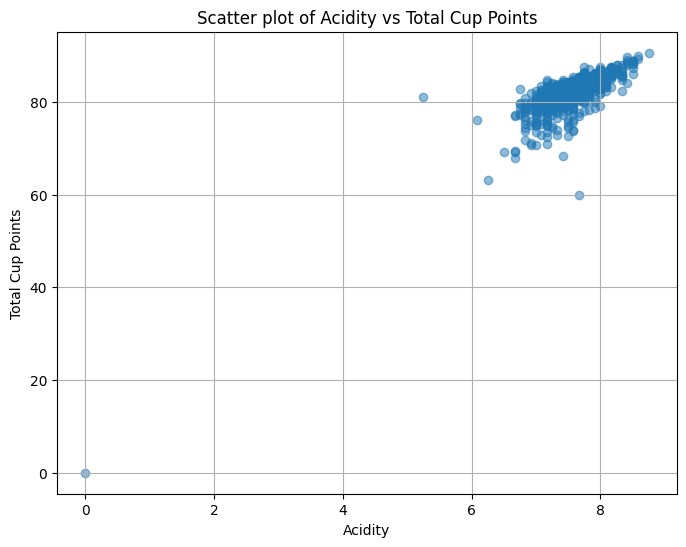

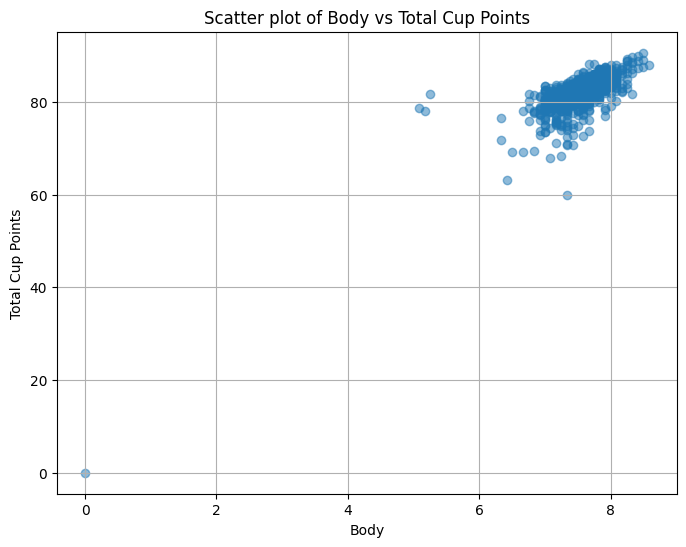

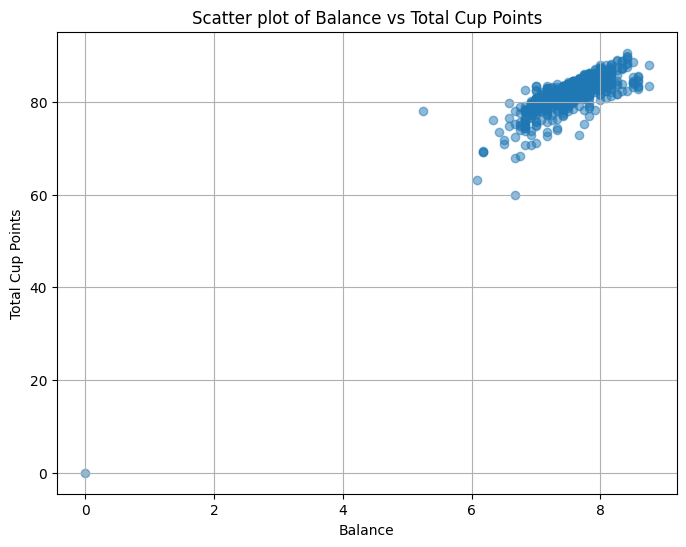

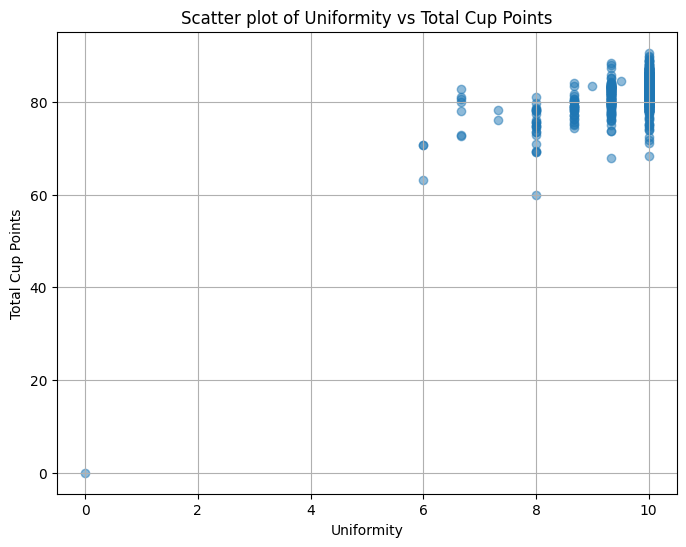

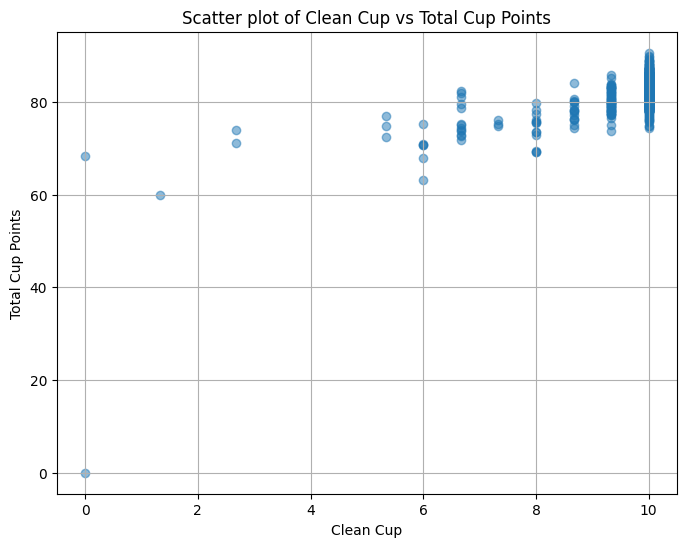

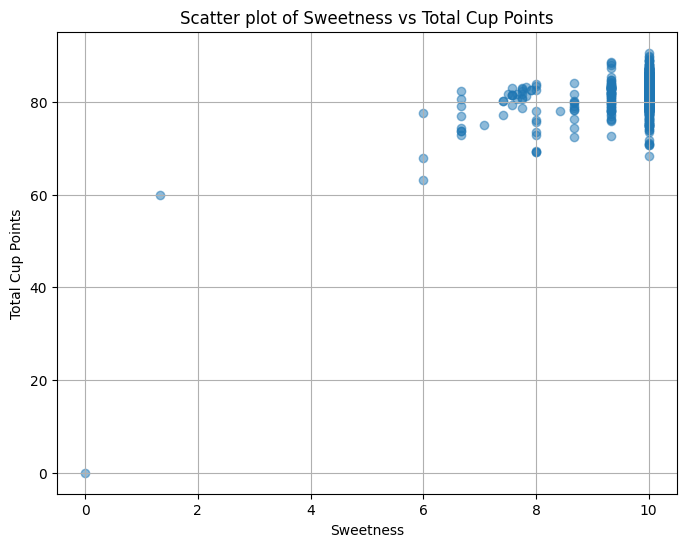

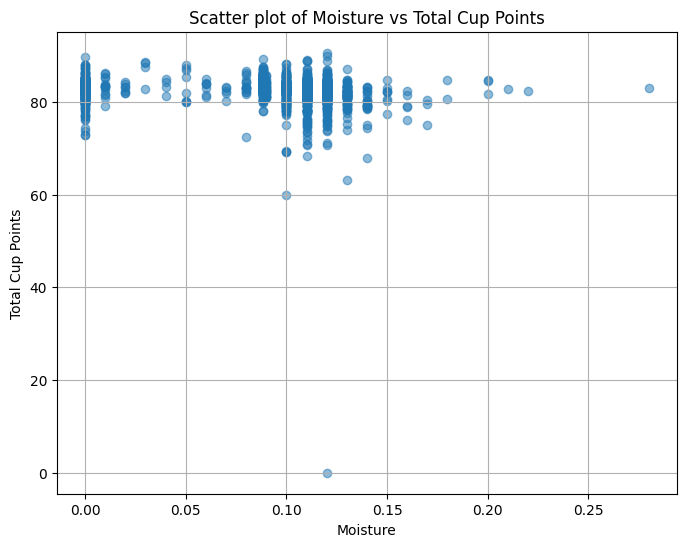

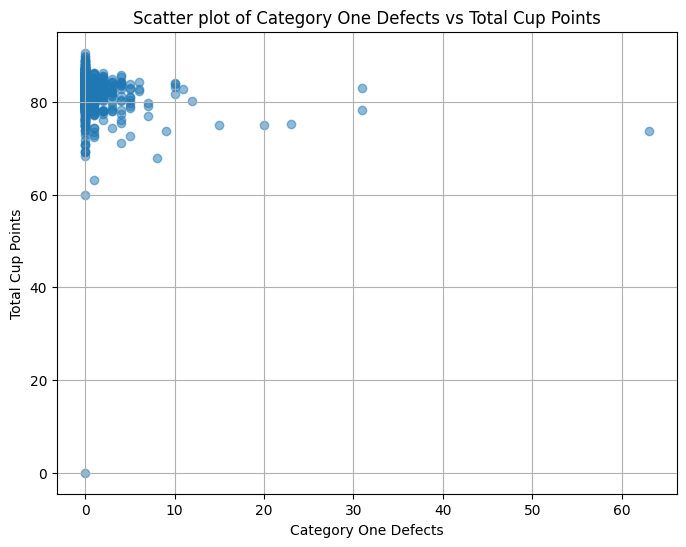

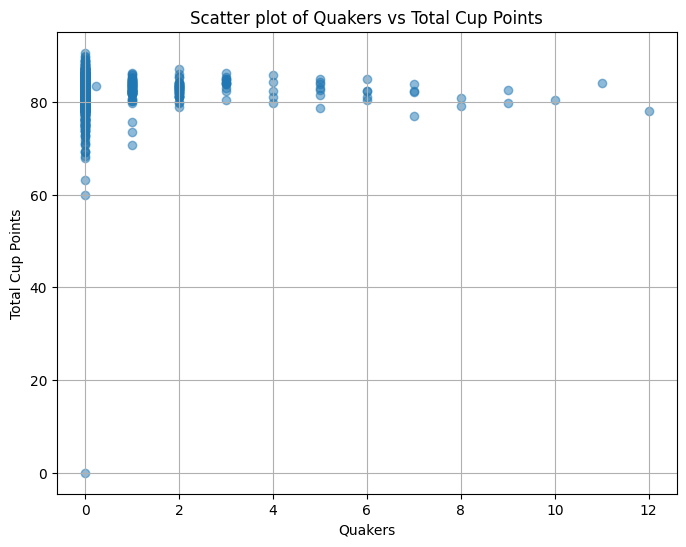

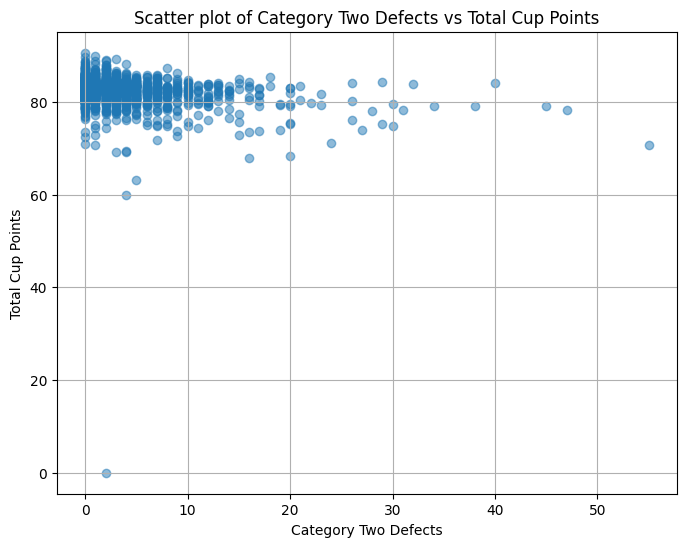

In [64]:
import matplotlib.pyplot as plt

#List of independent variables (column names in the Dataframe)
independent_vars = ['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 
                    'Balance', 'Uniformity', 'Clean Cup', 'Sweetness', 
                    'Total Cup Points', 'Moisture', 'Category One Defects', 
                    'Quakers', 'Category Two Defects']

# Plotting each independent variable against 'Total Cup Points'
for var in independent_vars:
    if var != 'Total Cup Points':  # Avoid plotting against itself
        plt.figure(figsize=(8, 6))
        plt.scatter(df_all_years[var], df_all_years['Total Cup Points'], alpha=0.5)
        plt.title(f'Scatter plot of {var} vs Total Cup Points')
        plt.xlabel(var)
        plt.ylabel('Total Cup Points')
        plt.grid(True)
        plt.show()

In [65]:
independent_vars = ['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 
                    'Balance', 'Uniformity', 'Clean Cup', 'Sweetness', 
                    'Total Cup Points', 'Category One Defects', 
                    'Quakers'] #Independent variable to check for this outlier

#Finding rows where all relevant independent variables are 0
zero_outlier_condition = (df_all_years[independent_vars] == 0).all(axis=1)
zero_outlier = df_all_years[zero_outlier_condition]

#Printing the outlier details
print('Thre coffee types where all relevant independent variables are 0 are: ')
print(zero_outlier)

Thre coffee types where all relevant independent variables are 0 are:
      Unnamed: 0            Owner Country Of Origin     Farm Name Lot Number  \
1310        1310  Bismarck Castro          Honduras  Los Hicaques        103   

                    Mill  Ico Number            Company Altitude     Region  \
1310  Cigrah S.A De C.V.  13-111-053  Cigrah S.A De C.V     1400  Comayagua   

      ... Moisture  Category One Defects Quakers  Color Category Two Defects  \
1310  ...     0.12                     0     0.0  Green                    2   

            Expiration            Certification Body  \
1310  April 28Th, 2018  Instituto Hondureño Del Café   

                         Certification Address  \
1310  B4660A57E9F8Cc613Ae5B8F02Bfce8634C763Ab4   

                         Certification Contact  Altitude_numeric  
1310  7F521Ca403540F81Ec99Daec7Da19C2788393880            1400.0  

[1 rows x 38 columns]


In [67]:
# Remove the outlier
df_final = df_all_years[~zero_outlier_condition]

# Verify the removal
print('Number of rows before removal: ', df_all_years.shape[0])
print('Number of rows after removal: ', df_final.shape[0])

Number of rows before removal: 1546
Number of rows after removal: 1545


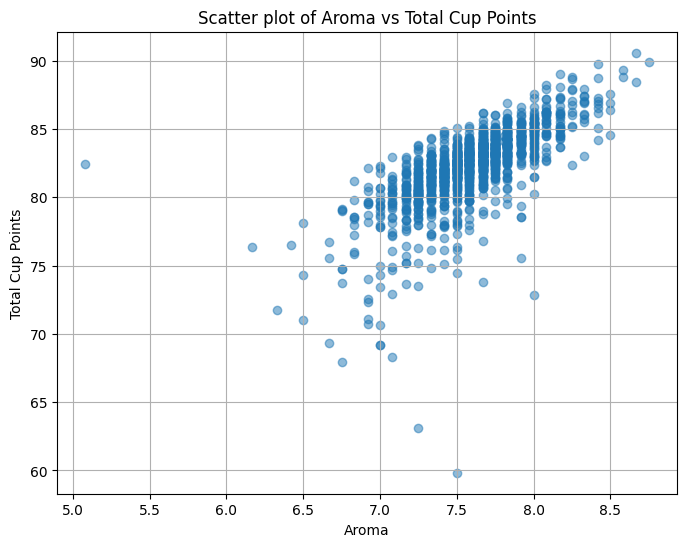

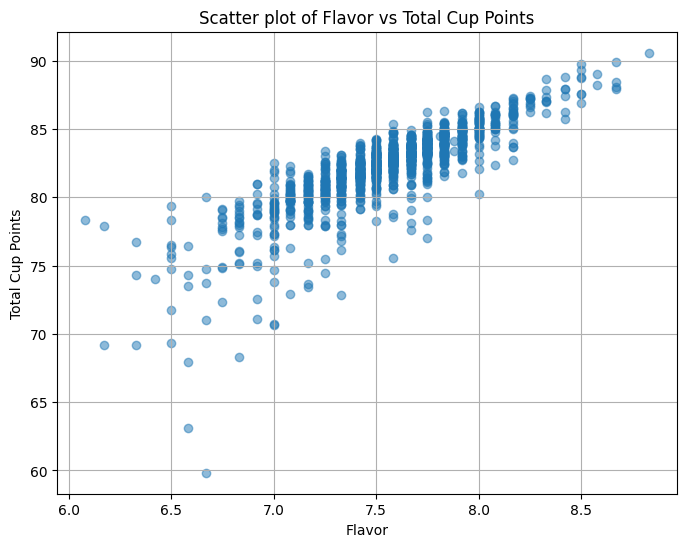

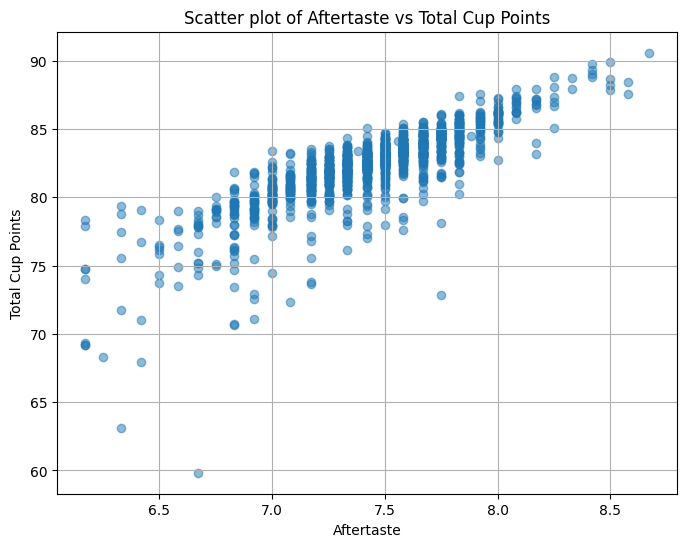

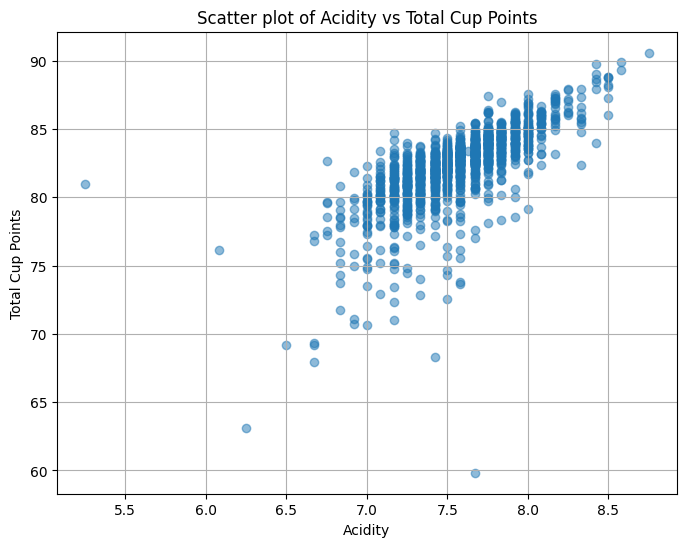

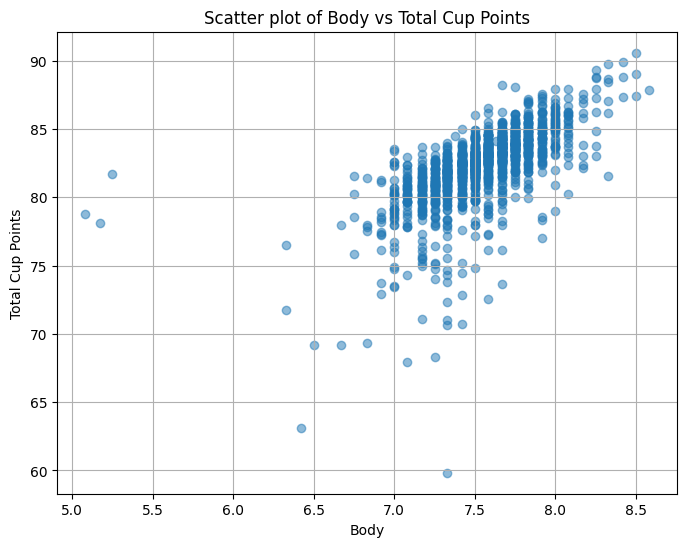

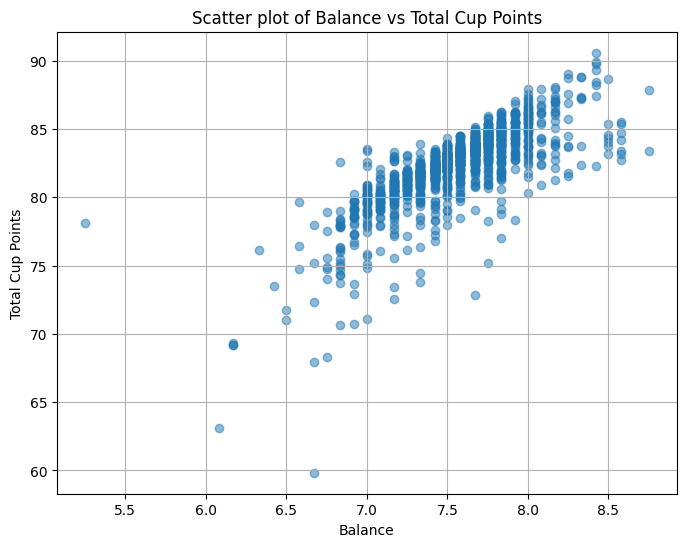

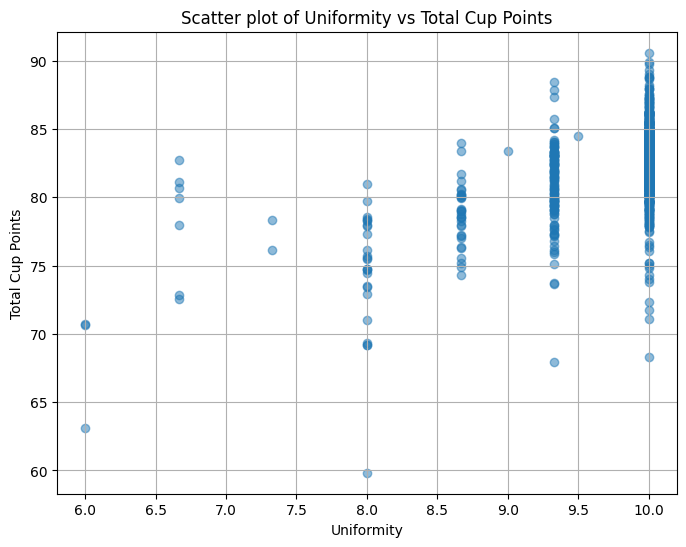

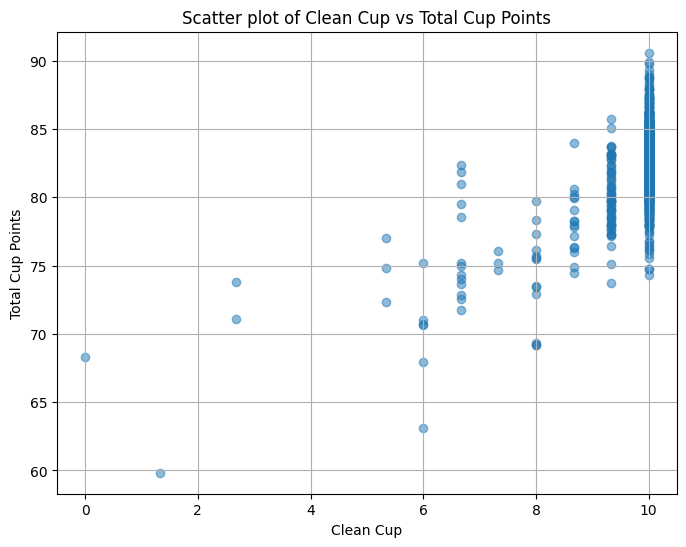

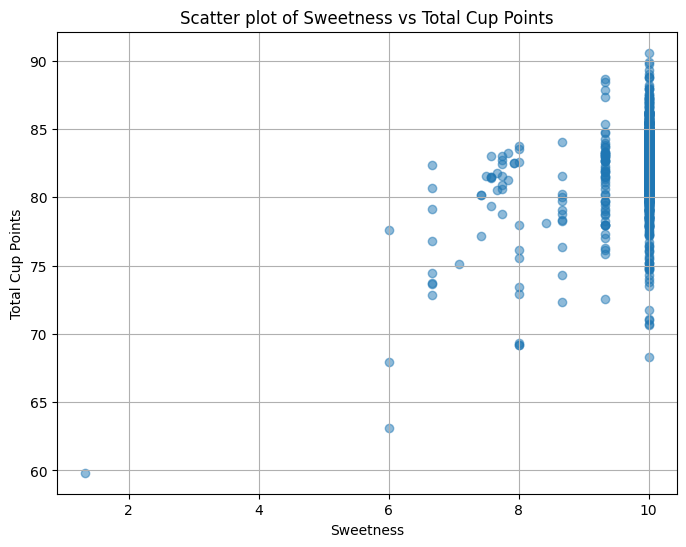

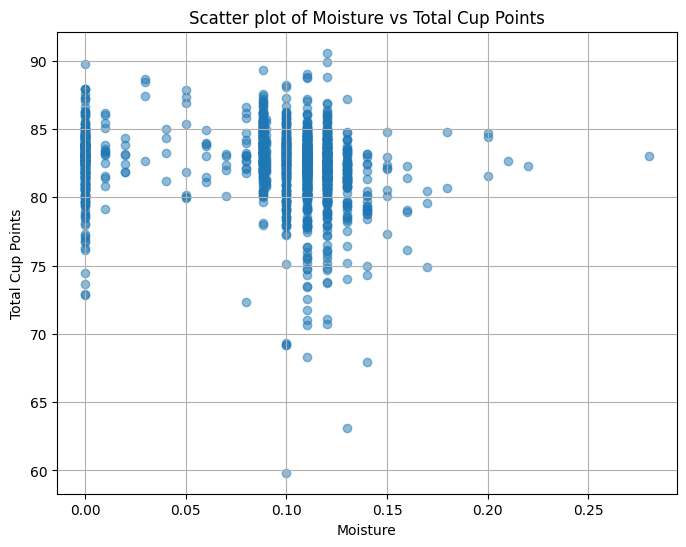

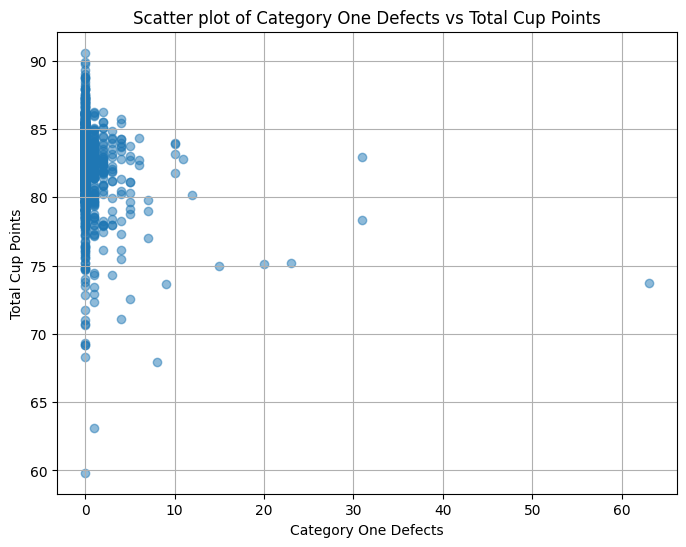

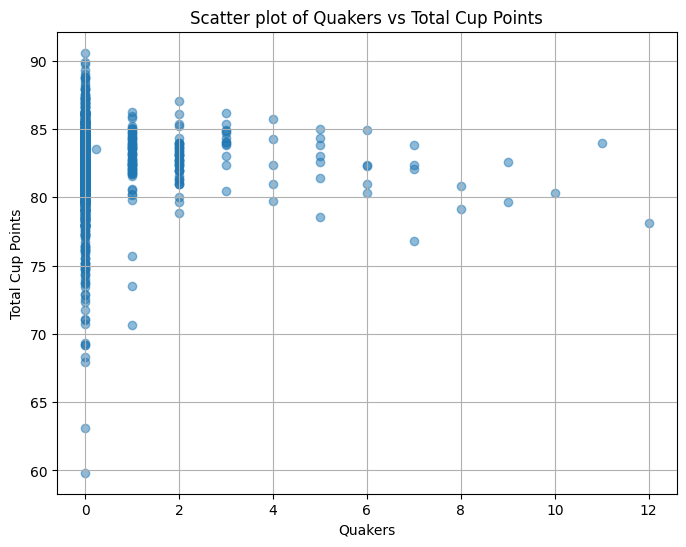

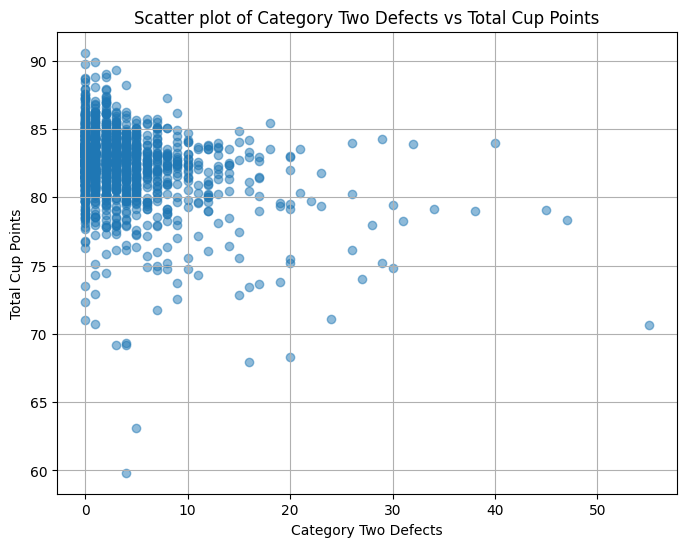

In [68]:
#List of independent variables (column names in the Dataframe)
independent_vars = ['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 
                    'Balance', 'Uniformity', 'Clean Cup', 'Sweetness', 
                    'Total Cup Points', 'Moisture', 'Category One Defects', 
                    'Quakers', 'Category Two Defects']

# Plotting each independent variable against 'Total Cup Points'
for var in independent_vars:
    if var != 'Total Cup Points':  # Avoid plotting against itself
        plt.figure(figsize=(8, 6))
        plt.scatter(df_final[var], df_final['Total Cup Points'], alpha=0.5)
        plt.title(f'Scatter plot of {var} vs Total Cup Points')
        plt.xlabel(var)
        plt.ylabel('Total Cup Points')
        plt.grid(True)
        plt.show()

In [72]:
# Assuming df_final is your DataFrame

# Add a constant to handle zeros using .loc
df_final.loc[:, 'Category One Defects'] += 1

# Apply the log transformation using .loc
df_final.loc[:, 'Category One Defects'] = np.log(df_final['Category One Defects'])

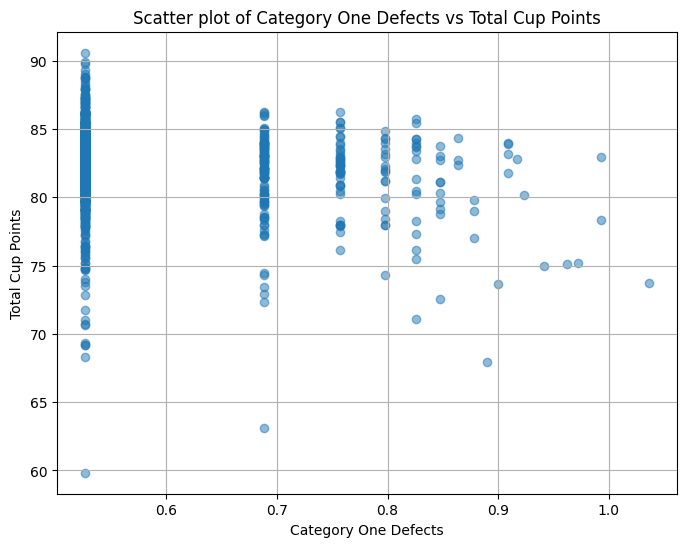

In [73]:
#Plotting 'Category One Defects' against 'Total Cup Points' to see the results of the transformation
plt.figure(figsize=(8, 6))
plt.scatter(df_final['Category One Defects'], df_final['Total Cup Points'], alpha=0.5)
plt.title('Scatter plot of Category One Defects vs Total Cup Points')
plt.xlabel('Category One Defects')
plt.ylabel('Total Cup Points')
plt.grid(True)
plt.show()

In [78]:
!pip install pandas statsmodels
import statsmodels.api as sm

# Define the dependent variable
y = df_final['Total Cup Points']

# Define the independent variables
X = df_final[['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 
              'Balance', 'Uniformity', 'Clean Cup', 'Sweetness', 
              'Moisture', 'Category One Defects', 'Quakers', 
              'Category Two Defects']]

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression model
print(model.summary())

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
                            OLS Regression Results                            
Dep. Variable:       Total Cup Points   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 1.237e+04
Date:                Tue, 09 Jul 2024   Prob (F-statistic):               0.00
Time:                        15:18:20   Log-Likelihood:                -84.587
No. Observations:                1545   AIC:                             197.2
Df Residuals:                    1531   BIC:                             272.0
Df Model:                          13                                         
Covariance Type:            nonrobust  

## Analysis of the results of the multiple linear regression: 
I got a very high R squared value of 0.991, indicating that 99% of the variance of the dependent variable can be explained by the independent variables. The Prob (F-statistics) is 0, which means that the p value of the group of independent variables is very significant in explaining the dependent variable. 

By looking at the individual p-values, I see that all these variable have a p-value of 0, meaning that they are very significant: 
Aroma                    1.0720      0.032     33.098      0.000       1.008       1.136
Flavor                   1.3873      0.045     30.903      0.000       1.299       1.475
Aftertaste               1.2870      0.042     30.829      0.000       1.205       1.369
Acidity                  1.0928      0.034     32.358      0.000       1.027       1.159
Body                     1.0000      0.032     31.349      0.000       0.937       1.063
Balance                  1.1859      0.033     36.398      0.000       1.122       1.250
Uniformity               1.0126      0.017     61.237      0.000       0.980       1.045
Clean Cup                1.0260      0.012     87.540      0.000       1.003       1.049
Sweetness                0.9676      0.014     69.912      0.000       0.940       0.995

Moisture is with a p-value of 0.022, which is higher but way lower than the usual threshold of 0.5 required to consider a variable as significant. So it is also a significant variable in explaining the dependent variable: 
Moisture                -0.3471      0.151     -2.300      0.022      -0.643      -0.051

In the same time we have these variables that are below the significance value with p-values of 0.752, 0.833 and 0.255, which are above 0.05. Their b-coefficinets in the regression model are 
Category One Defects    -0.0269      0.085     -0.317      0.752      -0.193       0.140
Quakers                 -0.0014      0.007     -0.211      0.833      -0.014       0.011
Category Two Defects    -0.0016      0.001     -1.139      0.255      -0.004       0.001

The results are similar to what I expected from the description of the dataset, where it was written that the Total Cup Points as some aggregate measurement based on the other quality indicators. However, I see that there is also something else in the formula they use to calculate the Total Cup Points because the fit of the regression is not 100% as it would be if the quality variables were the only used measures of the quality of the coffee. Anyways, the model is a good fit and is predictable enough and one can see which variables weight more in the formula. Flavor is the most important factor in detemining the Total Cup Points (a b coefficient of 1.3873), followed by Aftertase, Balance, Acidity, Aroma, Clean Cup, Uniformity, Body and Moisture. 